# 2020.2.29 TIL

어떤 문제 상황에서 어떤 기법을 택해야할지 고민했던 부분을 정리함.
정리2의 경우 [참조_분할 정복](https://m.blog.naver.com/kks227/220776241154)을 참조하였고, 정리3의 경우 [참조_솔빙토크](https://swexpertacademy.com/main/talk/solvingTalk/boardCommuView.do?searchCondition=COMMU_DETAIL-COMMU_TITLE-NICK_NAME_TAG&commuId=AXCKd6oKuXkDFAQK&searchKeyword=&orderBy=DATE_DESC&pageSize=10&pageIndex=1&&&&&&)를 인용하고 덧붙임

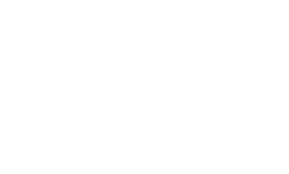

# 정리 1. 재귀함수, 메모이제이션, DP

같은 문제를 재귀함수, 메모이제이션, DP의 기법으로 풀 수 있음
- 피보나치 구현 문제에서 시간 복잡도는 각각 O(2^N), O(N), O(N)

In [1]:
#재귀함수 피보나치 #가독성이 좋고 본래 점화식을 이해하기 쉬움
def fibo(n):
    if n < 2:
        return n
    return fibo(n-1) + fibo(n-2)
print(fibo(5))

5


In [2]:
#메모이제이션 피보나치 
def fibo(n):
    if n >= 2 and len(memo) <= n:
        memo.append(fibo(n-1) + fibo(n-2))
    return memo[n]
memo = [0,1]
print(fibo(5))

5


In [5]:
#DP 피보나치 #함수를 별도로 호출하지 않아 시간과 메모리를 절약할 수 있음
def fibo(n):
    f = [0,1]
    for i in range(2, n+1):
        f.append(f[i-1] + f[i-2])
    return f[n]
print(fibo(5))

5


In [37]:
#DP 피보나치2
def fibo(n):
    f = [0]*(n+3) #f리스트 여유있게 만들어주기
    f[1] = 1
    for i in range(n+1):
        f[i+2] += f[i]
        f[i+1] += f[i]
    return f[n]
print(fibo(5))

5


DP는 주어진 문제를 여러개의 부분 문제들로 나눈 다음, 그 결과로 주어진 문제를 푸는 것
- 분할정복과 비슷해보이는데, DP와 분할정복의 차이는
    - 분할 정복은 문제를 분할했을 때 겹치는 문제가 발생하지 않지만
    - DP는 겹치는 문제가 발생하기 때문에 메모이제이션이 필요

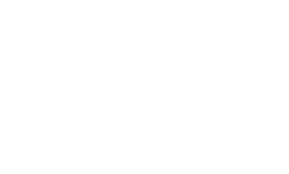

# 정리 2. 분할 정복

### 분할 정복이란
- 문제를 두 단계, 즉 분할과 정복으로 나눠서 해결하는 것
- 문제의 크기가 엄청나게 줄어들면(n=1, n=2) 바로 답을 구할 수 있는 수준이 되고, 이것이 재귀 호출로 문제를 풀 때의 base case와 같음
- 재귀로 연결되는 경우가 많지만, 꼭 그런 것은 아님
- 그리하여 base case의 답을 풀고 -> 큰 문제는 이 답을 통해 간단한 연산으로 해결
- 그냥 풀 때보다 이미 풀린 부분문제를 합치는 것이 월등히 빠를 때 이용
    - 그 예로는 **merge sort, binary search, 거듭제곱 연산**이 있음

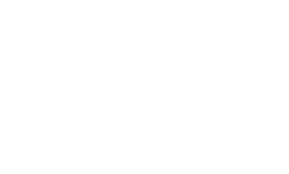

# 정리 3. DFS, BFS, 다익스트라

같은 문제를 **DFS, BFS, 다익스트라**의 다양한 기법을 사용해 풀 수 있음. 이 때

## 어떤 문제 조건에서 어떤 기법을 선택할 것인가?



답은
### 정점들이 어떻게 이어져있는지에 따라 달라짐

예를들어
- 이차원의 형태로 상하좌우가 모두 연결되어 있는 경우, 모든 경우의 수를 따지면 매 정점마다 세 가지 방향으로 갈 수 있음(이전 위치로 가는 것을 제외하기 때문에)
- 이 때 깊이가 x라면 경우의 수는 3^x

### 이 문제를 DFS로 푼다면
- 깊이가 깊어질수록(경로가 길수록) 지수적으로 경우의 수가 증가함
- 물론 깊이가 일정 이상 초과할 때 백트래킹을 하면 많이 줄어듦
- 하지만 DFS는 언제 최적의 경로를 찾을지, 찾았어도 그 값이 정말 최적인지 알 수 없어 다른 경로들을 모두 돌아보게 됨

### 이 문제를 BFS로 푼다면
- 깊이가 깊어질수록(경로가 길수록) 경우의 수는 깊이에 비례하여 증가함. 즉 (깊이-1)*4
- 최초로 도착한 그 순간이 최소값임이 보장됨

### 이 문제를 다익스트라로 푼다면
- 다익스트라는 최소 거리를 계속 갱신하는 방식으로 작동함
- 이 때 우선순위 큐를 사용하면 대부분의 경우 최단거리를 보다 신속하게 찾을 수 있음. 이미 최단거리에서 갱신되어 나왔을 것이기 때문
- 하지만 이 경우에도 한 개의 정점에서 꼬리를 물면서 계속 큐에 집어넣는 경우 추가적으로 시간이 요구됨
    - 즉 1-2, 1-3, 1-4, ..., 1-N의 경우
    - 1-2경로, 1-3경로, 1-4경로... 경로가 중복되어 들어감
    - BFS에서 N번 수행하면 되는 문제를 NlogN으로 풀어야 함 (힙에 넣는 시간이 logN, 경로의 개수가 N이므로 둘을 곱하여 계산함)

## 결론으로
- 기법의 선택은 정점 하나에 연결된 점의 개수가 몇 개인지, 즉 그래프의 형태에 따라 달라짐
- 정점 하나에 연결된 점이 최대 두 개인 경우, DFS 혹은 단순 for문으로 해결 가능하고
- 연결된 점이 2개, 3개, 4개... N개로 변함에 따라 유리한 기법이 달라짐
- 특히 최단 거리를 구하는 문제에서는
    - 간선들의 길이가 작을 때는 BFS를 시도
    - BFS는 간선이 단위 길이로 이루어졌을 때 방문하는 시점마다 해당 정점의 최단 경로를 구하기 때문에 다익스트라보다 빠를 수 있음
    - 즉 주어진 간선을 단위길이의 간선으로 쪼개서 정점을 만든 후 BFS 탐색하여 모든 정점의 최단거리를 구할 것